<a href="https://colab.research.google.com/github/SinSham/IMDB-Review-Sentiment-Analysis/blob/main/movie_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!pip install wordcloud

In [ ]:
!pip install contractions

  Using cached contractions-0.1.73-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached anyascii-0.3.2-py3-none-any.whl.metadata (1.5 kB)
  Using cached pyahocorasick-2.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (13 kB)
Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
Using cached anyascii-0.3.2-py3-none-any.whl (289 kB)
Using cached pyahocorasick-2.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (110 kB)


**Importing Dependencies**

In [ ]:
import os
import json

from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Data Collection**

In [ ]:
kaggle_dict = json.load(open('kaggle.json'))

In [ ]:
kaggle_dict.keys()

dict_keys(['username', 'key'])

In [ ]:
# setting up kaggle credentials as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_dict['username']
os.environ['KAGGLE_KEY'] = kaggle_dict['key']

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 78% 20.0M/25.7M [00:00<00:00, 98.6MB/s]
100% 25.7M/25.7M [00:00<00:00, 96.4MB/s]


In [ ]:
#Unzipping the dataset file
with ZipFile('/content/imdb-dataset-of-50k-movie-reviews.zip', 'r') as zip_ref:
  zip_ref.extractall()

**Loading the Data**

In [ ]:
data = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.replace({'sentiment' : {'positive': 1, 'negative' : 0}}, inplace = True)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


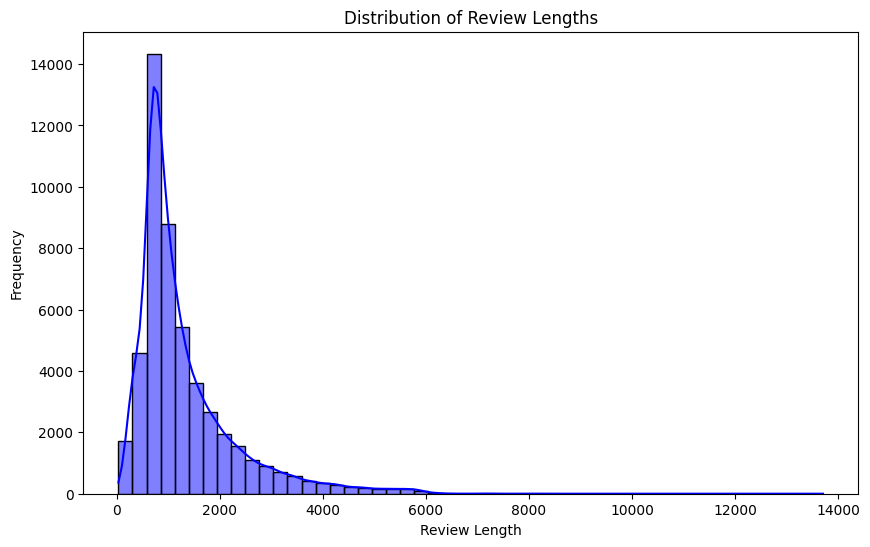

In [ ]:
data['review_length'] = data['review'].apply(len)
data['review_length'].describe()

plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from collections import Counter
import re
import contractions

def clean_text(review):
    review = contractions.fix(review)
    review = review.lower()
    review = re.sub(r'<.*?>', ' ', review)
    review = re.sub(r'[^a-zA-Z\s]', ' ', review)
    review = re.sub(r'\s+', ' ', review).strip()

    return review

In [ ]:
data['cleaned_review'] = data['review'].apply(clean_text)

In [ ]:
data.head()

,review,sentiment,review_length,cleaned_review
0,One of the other reviewers has mentioned that ...,1,1761,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,998,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,1,926,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,748,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,petter mattei s love in the time of money is a...


In [ ]:
data['cleaned_review'][3]

'basically there is a family where a little boy jake thinks there is a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when you are going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots out of just for the well playing parents descent dialogs as for the shots with jake just ignore them'

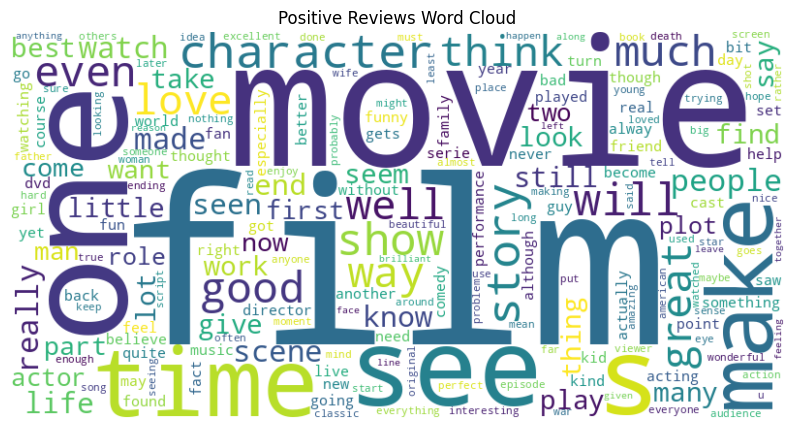

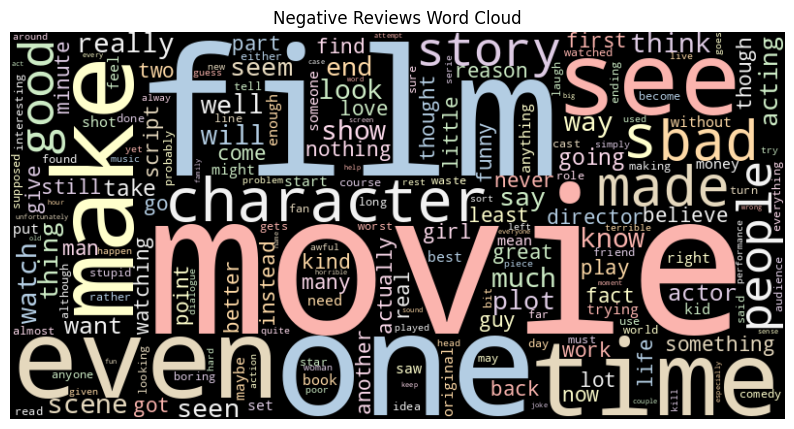

In [ ]:
from wordcloud import WordCloud

positive_words = ' '.join(data[data['sentiment'] == 1]['cleaned_review']).split()
negative_words = ' '.join(data[data['sentiment'] == 0]['cleaned_review']).split()
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))

negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(' '.join(negative_words))

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()

In [ ]:
#split data into training and test data

train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(40000, 4)
(10000, 4)


**Preprocessing the Data**

In [ ]:
#Tokenize the text data

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data['cleaned_review'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['cleaned_review']), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['cleaned_review']), maxlen=200)

In [ ]:
print(X_train)

[[1172    4 2831 ...  195  338 3802]
 [ 575   30    3 ...   12  104    7]
 [   0    0    0 ...    2  686   62]
 ...
 [   0    0    0 ... 1605    2  574]
 [   0    0    0 ...  235  104  125]
 [   0    0    0 ...   68   76 1946]]


In [ ]:
print(X_test)

[[   0    0    0 ...  185    7  963]
 [  48   28  845 ...   47    9  365]
 [   0    0    0 ...   51 1048   98]
 ...
 [   0    0    0 ...  125  194 2911]
 [   0    0    0 ... 1032    1 2250]
 [   0    0    0 ...    1  321   27]]


In [ ]:
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [ ]:
print(y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [ ]:
print(y_test)

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


LSTM

In [ ]:
# building the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Training the model**

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 591s 1s/step - accuracy: 0.7128 - loss: 0.5419 - val_accuracy: 0.8250 - val_loss: 0.4231
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - accuracy: 0.8430 - loss: 0.3771 - val_accuracy: 0.8294 - val_loss: 0.4315
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 658s 1s/step - accuracy: 0.8519 - loss: 0.3585 - val_accuracy: 0.8413 - val_loss: 0.3749
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 625s 1s/step - accuracy: 0.8682 - loss: 0.3233 - val_accuracy: 0.8686 - val_loss: 0.3165
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 621s 1s/step - accuracy: 0.8907 - loss: 0.2713 - val_accuracy: 0.8721 - val_loss: 0.3037


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 262ms/step - accuracy: 0.8724 - loss: 0.2991
Test Loss: 0.2927418351173401
Test Accuracy: 0.8777999877929688


**Building a predictive system**

In [ ]:
def predict_sentiment(review):
  # clean, tokenize and pad the review
  clean_review = clean_text(review)
  sequence = tokenizer.texts_to_sequences([clean_review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [ ]:
# example usage

test_review = "Movie was awesome"
sentiment = predict_sentiment(test_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
The sentiment of the review is: positive


In [ ]:
# example usage

test_review = "Movie was not that good. It was mediocre"
sentiment = predict_sentiment(test_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The sentiment of the review is: negative


In [ ]:
# example usage

test_review = "Movie was boring"
sentiment = predict_sentiment(test_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The sentiment of the review is: negative


In [ ]:
model.save('IMDB_sentiment_analyzer__model.h5')

In [ ]:
model.save('IMDB_sentiment_analyzer__model.keras')